<a href="https://colab.research.google.com/github/jmlira2002/Regresi-n-Logistica/blob/main/Actividad_7_(Regresi%C3%B3n_Log%C3%ADstica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# José María Martínez Lira - A01707738

In [210]:
#Cargamos librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Agregar el archivo: “Cuentas_credicel.csv”

In [211]:
df = pd.read_csv('cuentas_credicel.csv')
df.head()

<ipython-input-211-3c80a7a5d960>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cuentas_credicel.csv')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


In [212]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

## Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers

In [213]:
df[df.columns[df.isnull().sum() > 0]].isnull().sum()

empresa                 13
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
razones_buro          7340
cp_cliente            7243
edad_cliente             9
edo_cliente              8
dtype: int64

In [214]:
df[df.columns[df.isnull().sum() > 0]].sample(10)

,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,razones_buro,cp_cliente,edad_cliente,edo_cliente
6183,comunicatec,NaN,NaN,NaN,NaN,NaN,20.0,GRO.
6209,servicel,31/01/2023 00:00,07/02/2023 00:00,NaN,NaN,NaN,26.0,YUC
14735,servicel,13/04/2023 00:00,21/04/2023 00:00,Corriente,"K0,J0,D8,D7",97758,30.0,YUC
4012,procredito,14/09/2022 00:00,21/09/2022 00:00,Mora,NaN,NaN,52.0,PUE.
10820,phuny,19/11/2022 00:00,26/11/2022 00:00,Fraude,"J0,E2,D2,E0",72760,44.0,PUE
22722,arcelular,18/04/2023 17:05,25/04/2023 00:00,NaN,"K0,D7,J0,E2",40080,42.0,GRO
14942,microtec,15/04/2023 00:00,22/04/2023 00:00,Corriente,C2,73070,30.0,PUE
8562,servicel,21/03/2023 00:00,28/03/2023 00:00,Mora,"K0,J0,E2,D8",97930,36.0,YUC
10533,microtec,19/12/2022 00:00,06/01/2023 00:00,Mora,C1,0,25.0,PUE
5606,microtec,09/10/2022 00:00,22/11/2022 00:00,Mora,NaN,NaN,25.0,PUE.


In [215]:
columna = ['empresa']
df[columna] = df[columna].fillna(method = 'ffill')

In [216]:
columna = ['fecha_ultimo_pago', 'fecha_pago_proximo']
df[columna] = df[columna].fillna('01/01/1900 00:00')

In [217]:
df['status_cuenta'].value_counts()

Corriente    10014
Mora          4604
Atraso        2960
Fraude        1696
Cancelado      147
Name: status_cuenta, dtype: int64

In [218]:
columna = ['status_cuenta']
df[columna] = df[columna].fillna('Corriente')

In [219]:
columna = ['razones_buro', 'edo_cliente', 'cp_cliente']
df[columna] = df[columna].fillna(method = 'bfill')

In [220]:
columna = ['edad_cliente']
df[columna] = df[columna].fillna(round(df[columna].mean(),0))

In [221]:
df['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce')
df['limite_credito'].fillna(7000, inplace=True)

In [222]:
df.isnull().sum().sum()

0

<Figure size 3000x5000 with 0 Axes>

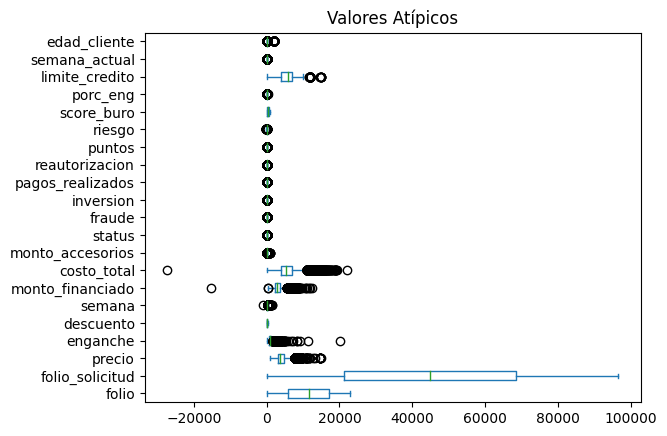

In [223]:
#Realizamos diagrama de caja del df
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(30, 50))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos")
plt.show()

In [224]:
#Seleccionamos solo las columnas númericas del df
datos_numericos = df.select_dtypes(include=['number'])

#Definimos los limites con desviación estándar
y=datos_numericos
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()

#Eliminamos los outliers
y= y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
y.isnull().sum()

folio                  0
folio_solicitud        0
precio               110
enganche             292
descuento             17
semana               362
monto_financiado     182
costo_total          290
monto_accesorios     617
status               154
fraude              1701
inversion              0
pagos_realizados     184
reautorizacion       774
puntos                 3
riesgo                65
score_buro             0
porc_eng             275
limite_credito         7
semana_actual        178
edad_cliente          99
dtype: int64

In [225]:
#Sustiyuimos outliers con el promedio
y=y.fillna(round(y.mean(),1))
#Revisamos que se hayan imputado bien los outliers
y.isnull().sum().sum()

0

In [226]:
#Desplegamos las medidas estadísticas del df antes de hacer el cambio de las vaiables númericas
df.describe()

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
count,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,...,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000
mean,11511.025951,45850.095711,3997.036591,926.437389,78.475742,237.747350,3076.136613,5699.692325,13.463768,1.255377,...,0.236596,10.180779,0.034044,14.156807,5.265978,289.953552,23.207056,5920.406862,20.611700,43.654893
std,6604.027249,27291.270417,1361.507164,476.686485,133.246426,101.180014,1096.727066,2385.965307,59.265704,0.451933,...,0.425001,9.708451,0.181347,11.399142,17.730115,284.022483,7.501417,2136.564751,14.589733,126.220157
min,3.000000,30.000000,973.240000,0.000000,0.000000,-1049.000000,-15150.000000,-27274.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,-15.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,5818.500000,21214.500000,3049.000000,625.500000,0.000000,170.000000,2363.000000,4056.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,10.000000,-5.700000,0.000000,18.450000,4000.000000,11.000000,26.000000
50%,11520.000000,44938.000000,3549.000000,826.000000,0.000000,214.000000,2824.000000,5213.000000,0.000000,1.000000,...,0.000000,8.000000,0.000000,12.000000,2.250000,427.000000,22.910000,6000.000000,16.000000,34.000000
75%,17224.500000,68485.500000,4899.000000,1112.000000,200.000000,285.000000,3699.000000,6877.000000,0.000000,1.000000,...,0.000000,15.000000,0.000000,14.000000,20.700000,548.000000,25.800000,7000.000000,26.000000,43.000000
max,22971.000000,96536.000000,14900.000000,20150.000000,500.000000,1385.000000,12330.000000,22204.000000,853.000000,4.000000,...,1.000000,62.000000,1.000000,50.000000,103.000000,814.000000,403.000000,15000.000000,74.000000,1972.000000


In [227]:
#Cambiamos las columnas númericas del df por las que se han dado tratamiento
# a los outliers
for columna in y.columns:
    df[columna] = y[columna]
# volvemos a obtener las medidas estadísticas para verificar que se hayan
# hecho los cambios en el df
df.describe()

#Se puede observar la diferencia en la columna 'precio'
#debido a que era una de las que contenia outliers

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
count,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,...,22735.000000,22735.000000,22735.0,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000
mean,11511.025951,45850.095711,3969.204786,897.571531,78.160343,231.393130,3043.789505,5588.620101,5.009721,1.243053,...,0.236596,9.916895,0.0,14.152083,5.244405,289.953552,22.809138,5917.636824,20.237985,35.344874
std,6604.027249,27291.270417,1295.204963,370.539236,132.746538,86.084072,1020.864637,2152.608806,23.849845,0.427671,...,0.425001,9.252767,0.0,11.391702,17.398553,284.022483,6.083129,2130.724972,13.969485,11.904960
min,3.000000,30.000000,973.240000,0.000000,0.000000,7.000000,249.000000,91.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,-15.000000,-47.000000,0.000000,2.750000,0.000000,0.000000,14.000000
25%,5818.500000,21214.500000,3049.000000,625.500000,0.000000,170.000000,2363.000000,4056.000000,0.000000,1.000000,...,0.000000,2.000000,0.0,10.000000,-5.500000,0.000000,18.450000,4000.000000,11.000000,26.000000
50%,11520.000000,44938.000000,3549.000000,826.000000,0.000000,214.000000,2824.000000,5213.000000,0.000000,1.000000,...,0.000000,8.000000,0.0,12.000000,2.400000,427.000000,22.800000,6000.000000,16.000000,34.000000
75%,17224.500000,68485.500000,4849.000000,1091.000000,200.000000,279.000000,3658.880000,6747.000000,0.000000,1.000000,...,0.000000,15.000000,0.0,14.000000,20.550000,548.000000,25.570000,7000.000000,26.000000,43.000000
max,22971.000000,96536.000000,8069.000000,2349.000000,400.000000,541.000000,6366.010000,12844.000000,190.000000,2.000000,...,1.000000,39.000000,0.0,48.000000,58.000000,814.000000,45.700000,12000.000000,64.000000,87.000000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  float64
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  float64
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [229]:
valores_unicos_por_columna = df.nunique()

print(valores_unicos_por_columna)

folio                 22735
tag                   22735
folio_solicitud       22727
fecha                 21590
marca                    29
modelo                  366
plazo                     4
precio                  483
enganche               1647
descuento                26
semana                  489
monto_financiado       7108
costo_total             790
monto_accesorios         88
agente_venta           1102
dis_venta               585
status                    3
fraude                    1
empresa                  48
inversion                 2
pagos_realizados         41
reautorizacion            1
fecha_ultimo_pago       730
fecha_pago_proximo      468
status_cuenta             5
puntos                   59
riesgo                 1596
score_buro              391
razones_buro           1000
porc_eng               2595
limite_credito           31
semana_actual            66
cp_cliente             3069
edad_cliente             70
cd_cliente             1921
edo_cliente         

In [230]:
df['inversion'].value_counts()

0    17356
1     5379
Name: inversion, dtype: int64

In [231]:
df['status'].value_counts()

1.0    17086
2.0     5495
1.2      154
Name: status, dtype: int64

In [232]:
df['plazo'].value_counts()

26S    10663
13S     6340
39S     5282
52S      450
Name: plazo, dtype: int64

In [233]:
df['status_cuenta'].value_counts()

Corriente    13328
Mora          4604
Atraso        2960
Fraude        1696
Cancelado      147
Name: status_cuenta, dtype: int64

In [234]:
df['marca'].value_counts()

Samsung         8991
SAMSUNG         3524
MOTOROLA        3078
ZTE             1948
Motorola        1658
NOKIA           1121
TECNO MOBILE     833
Hisense          371
HISENSE          270
Nokia            262
ALCATEL          215
TCL              113
Alcatel          101
Lanix             90
VIVO              60
Vivo              45
LG                20
WIKO               9
NYX                7
B2M                4
KODAK              3
RT                 3
LANIX              2
INCO               2
Huawei             1
SENWA              1
alcatel            1
Senwa              1
TECHPAD            1
Name: marca, dtype: int64

In [235]:
df.loc[df['marca'] == 'SAMSUNG', 'marca'] = 'Samsung'

In [236]:
df.loc[df['marca'] == 'MOTOROLA', 'marca'] = 'Motorola'

In [237]:
df['marca'].value_counts()

Samsung         12515
Motorola         4736
ZTE              1948
NOKIA            1121
TECNO MOBILE      833
Hisense           371
HISENSE           270
Nokia             262
ALCATEL           215
TCL               113
Alcatel           101
Lanix              90
VIVO               60
Vivo               45
LG                 20
WIKO                9
NYX                 7
B2M                 4
KODAK               3
RT                  3
LANIX               2
INCO                2
Huawei              1
SENWA               1
alcatel             1
Senwa               1
TECHPAD             1
Name: marca, dtype: int64

##Convertir las variables que sean necesarias en variables de tipo  dicotómica con las categorías que se consideren pertinentes, aplicando la herramienta de  “Regresión Logística”

In [238]:
df['status']= df['status'].replace([1.2], 1)
# Status como variable dependiente
df1 = df.copy()

In [239]:
#Inversion como variable dependiente
df2 = df.copy()

In [240]:
#Plazo como variable dependiente, solo se selecionaron los plazos mas registrados
df3 = df[(df['plazo'].str.contains('26S|13S'))]

In [241]:
#Status_cuenta como variable dependiente, solo se selecionaron los status de cuenta mas registrados
df4 = df[(df['status_cuenta'].str.contains('Corriente|Mora'))]

In [242]:
#Marca como variable dependiente, solo se selecionaron las marcas mas registradas
df5 = df[(df['marca'].str.contains('Samsung|Motorola'))]

In [243]:
# DF para almacenar los coeficientes del modelo
coeficientes = pd.DataFrame(columns=['Variable', 'Modelo', 'Precision', 'Exactitud', 'Sensibilidad'])

## Analizar 10 casos de correlación logística que existe entre diferentes variables de nuestra base de datos, aplicando la herramienta de “Regresión Logística”

###Modelo 1

In [244]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df1[['precio', 'puntos', 'riesgo']]
Var_Dep= df1['status']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [245]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [246]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [247]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5118    4]
 [1696    3]]


In [248]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
coeficientes.loc[0] = ['Status', 'Modelo 1', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 2

In [249]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df1[['monto_financiado', 'edad_cliente']]
Var_Dep= df1['status']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [250]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [251]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [252]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5138    0]
 [1683    0]]


In [253]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
coeficientes.loc[1] = ['Status', 'Modelo 2', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 3

In [254]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df2[['enganche', 'score_buro', 'riesgo']]
Var_Dep= df2['inversion']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [255]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [256]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [257]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5181    0]
 [1640    0]]


In [258]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
coeficientes.loc[2] = ['Inversión', 'Modelo 3', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 4

In [259]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df2[['pagos_realizados', 'edad_cliente', 'riesgo']]
Var_Dep= df2['inversion']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [260]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [261]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [262]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5165   80]
 [1541   35]]


In [263]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
coeficientes.loc[3] = ['Inversión', 'Modelo 4', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 5

In [264]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df3[['porc_eng', 'monto_financiado', 'riesgo']]
Var_Dep= df3['plazo']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [265]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [266]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['26S', '26S', '26S', ..., '26S', '26S', '26S'], dtype=object)

In [267]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  84 1808]
 [  44 3165]]


In [268]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label='26S')
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label='26S')
coeficientes.loc[4] = ['Plazo', 'Modelo 5', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 6

In [269]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df3[['porc_eng','monto_financiado', 'semana']]
Var_Dep= df3['plazo']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [270]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [271]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['26S', '13S', '13S', ..., '26S', '13S', '26S'], dtype=object)

In [272]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[1737  119]
 [  16 3229]]


In [273]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label='26S')
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label='26S')
coeficientes.loc[5] = ['Plazo', 'Modelo 6', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 7


In [274]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df4[['edad_cliente', 'semana_actual', 'precio']]
Var_Dep= df4['status_cuenta']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [275]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [276]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Corriente', 'Mora', 'Corriente', ..., 'Corriente', 'Corriente',
       'Mora'], dtype=object)

In [277]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[3695  289]
 [ 702  694]]


In [278]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label='Corriente')
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label='Corriente')
coeficientes.loc[6] = ['Status_cuenta', 'Modelo 7', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 8


In [279]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df4[['edad_cliente', 'precio', 'pagos_realizados']]
Var_Dep= df4['status_cuenta']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [280]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [281]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Corriente', 'Corriente', 'Corriente', ..., 'Corriente',
       'Corriente', 'Corriente'], dtype=object)

In [282]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[3952    0]
 [1428    0]]


In [283]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label='Corriente')
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label='Corriente')
coeficientes.loc[7] = ['Status_cuenta', 'Modelo 8', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 9


In [284]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df5[['descuento', 'enganche', 'edad_cliente']]
Var_Dep= df5['marca']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [285]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [286]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Samsung', 'Samsung', 'Samsung', ..., 'Samsung', 'Samsung',
       'Samsung'], dtype=object)

In [287]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  77 1329]
 [ 109 3661]]


In [288]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label='Samsung')
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label='Samsung')
coeficientes.loc[8] = ['Marca', 'Modelo 9', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 10


In [289]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df5[['descuento', 'semana', 'score_buro']]
Var_Dep= df5['marca']
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [290]:
#Se escalan todos los datos
escalar = StandardScaler()
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [291]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Samsung', 'Samsung', 'Samsung', ..., 'Samsung', 'Samsung',
       'Samsung'], dtype=object)

In [292]:
#Visualizamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  15 1426]
 [   7 3728]]


In [293]:
#Calculamos las medidas de presición, exactitud y sensibilidad
precision = precision_score(y_test, y_pred, average="binary", pos_label='Samsung')
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label='Samsung')
coeficientes.loc[9] = ['Marca', 'Modelo 10', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Realizar una tabla de todos los coeficientes de precisión, exactitud y sensibilidad obtenidos para cada correlación analizada, según sea el caso.

In [294]:
coeficientes.head(10)

,Variable,Modelo,Precision,Exactitud,Sensibilidad
0,Status,Modelo 1,0.75,0.75,1.00
1,Status,Modelo 2,0.75,0.75,1.00
2,Inversión,Modelo 3,0.76,0.76,1.00
3,Inversión,Modelo 4,0.77,0.76,0.98
4,Plazo,Modelo 5,0.64,0.64,0.99
5,Plazo,Modelo 6,0.96,0.97,1.00
6,Status_cuenta,Modelo 7,0.84,0.82,0.93
7,Status_cuenta,Modelo 8,0.73,0.73,1.00
8,Marca,Modelo 9,0.73,0.72,0.97
9,Marca,Modelo 10,0.72,0.72,1.00
